In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

### Part I: Using PCA to project 2-D data onto its principal axes

In [2]:
# Create dataset

np.random.seed(42)
mean = [0, 0]
cov = [[3, 2], [2, 2]]
X = np.random.multivariate_normal(mean=mean, cov=cov, size=200)

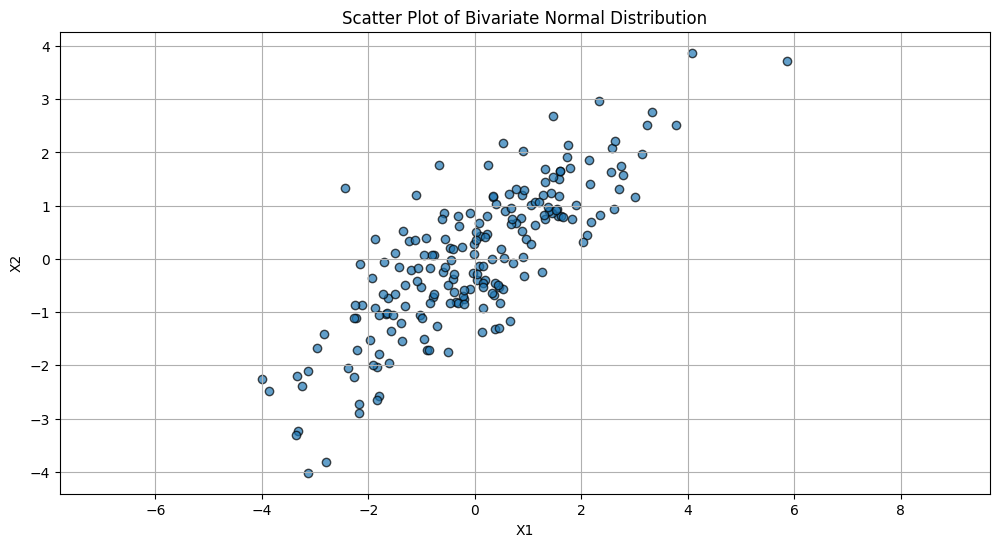

In [3]:
# Visualizing the relationship between the two features

plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], ec="k", alpha=0.7)
plt.title("Scatter Plot of Bivariate Normal Distribution")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis("equal")
plt.grid(True)
plt.show()

### Perform PCA on the dataset

In [4]:
# Initialize a 2-component PCA model with default parameters and then fit and transform the feature space in one step.

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

### Get the principal components from the model.

In [5]:
#Principal components are the principal axes, represented in feature space coordinates, which align with the directions of maximum variance in your data.

components = pca.components_
components

array([[ 0.78215821,  0.62307987],
       [-0.62307987,  0.78215821]])

In [6]:
# The principal components are sorted in decreasing order by their explained variance, which can be expressed as a ratio:

pca.explained_variance_ratio_

array([0.9111946, 0.0888054])

In [7]:
projection_pc1 = np.dot(X, components[0])
projection_pc2 = np.dot(X, components[1])

In [8]:
x_pc1 = projection_pc1 * components[0][0]
y_pc1 = projection_pc1 * components[0][1]
x_pc2 = projection_pc2 * components[1][0]
y_pc2 = projection_pc2 * components[1][1]

### Plot the results

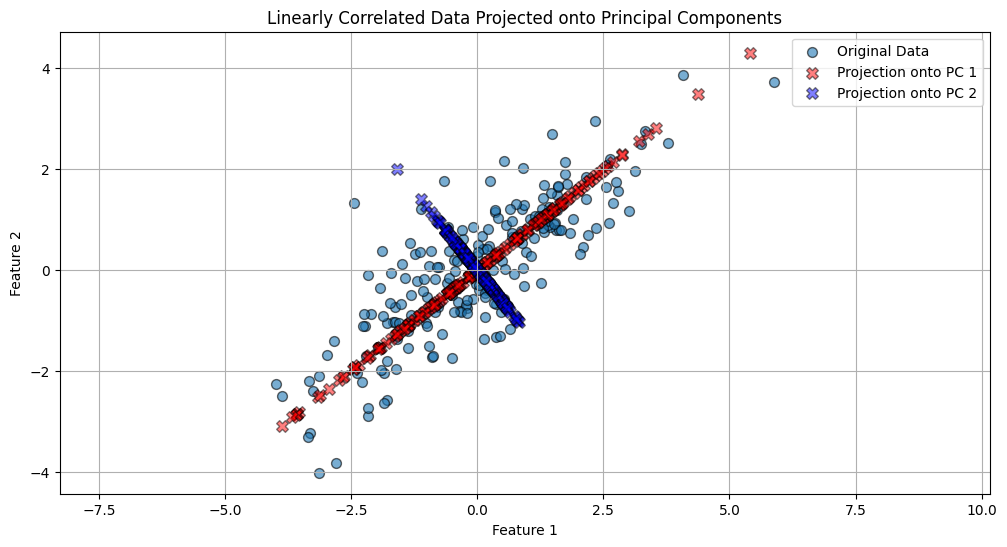

In [9]:
# Plot original data
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:, 1], label="Original Data", ec="k", s=50, alpha=0.6)

# Plot the projections along PC1 and PC2
plt.scatter(x_pc1, y_pc1, c="r", ec="k", marker="X", s=70, alpha=0.5, label="Projection onto PC 1")
plt.scatter(x_pc2, y_pc2, c="b", ec="k", marker="X", s=70, alpha=0.5, label="Projection onto PC 2")
plt.title('Linearly Correlated Data Projected onto Principal Components', )
plt.xlabel('Feature 1',)
plt.ylabel('Feature 2',)
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()

### Part II. PCA for feature space dimensionality reduction

In [10]:
# Load the Iris dataset
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [11]:
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Iris flower's names?
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
# Initialize a PCA model and reduce the Iris data set dimensionality to two components

# Apply PCA and reduce the dataset to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

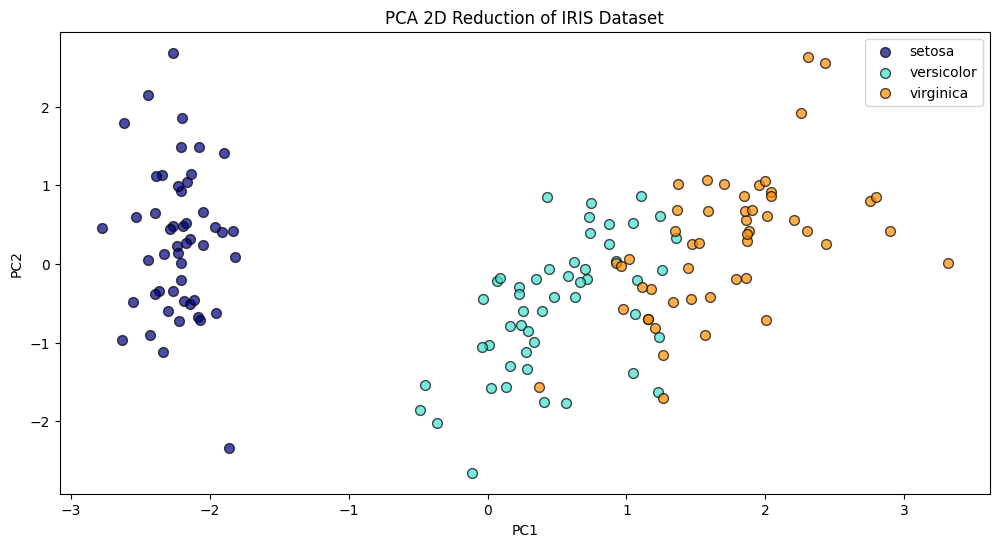

In [14]:
# Plot the PCA-transformed data in 2D
plt.figure(figsize=(12, 6))

for i, color in enumerate(['navy', 'turquoise', 'darkorange']):
    plt.scatter(X_pca[y==i, 0], X_pca[y==i, 1], color=color, s=50, ec="k", alpha=0.7, label=target_names[i])
    
plt.title('PCA 2D Reduction of IRIS Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [15]:
# What percentage of the original feature space variance do these two combined principal components explain?
100*pca.explained_variance_ratio_.sum()

np.float64(95.81320720000166)

In [16]:
# Reinitialize the PCA model without reducing the dimension

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

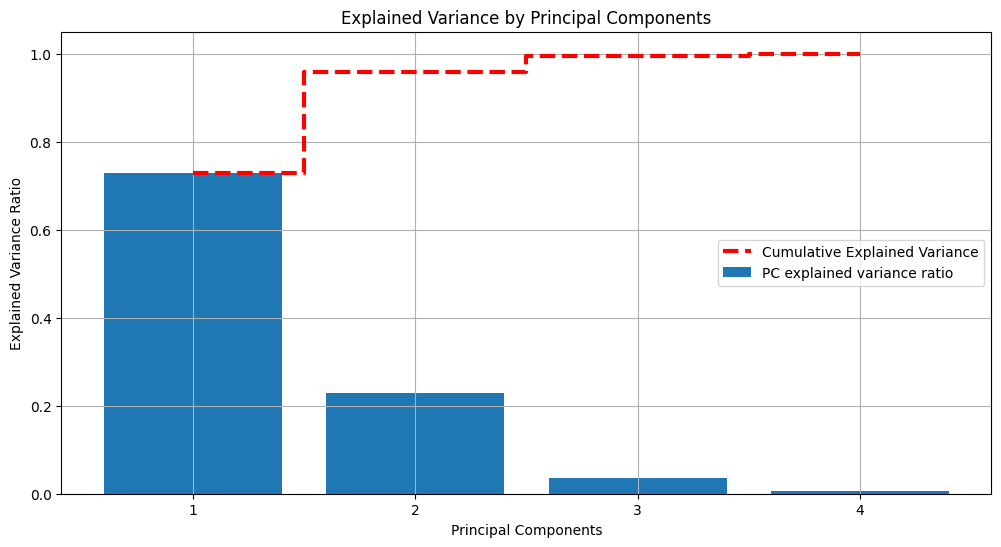

In [25]:
# Get how much variance each principal component explains
explained_variance_ratio = pca.explained_variance_ratio_

# Add them up to see total variance over components
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot the individual and cumulative variances
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, alpha=1, align="center", label="PC explained variance ratio")
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Principal Components')

plt.step(range(1, 5), cumulative_variance, where='mid', linestyle='--', lw=3,color='red', label='Cumulative Explained Variance')
# Add legend
plt.xticks(range(1, 5))
plt.legend()
plt.grid(True)
plt.show()